# L4: Real-World Prompting

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [9]:
from anthropic import Anthropic

In [10]:
# Load environment variables
from helper import load_env
load_env()

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [11]:
client = Anthropic()
MODEL_NAME="claude-3-5-sonnet-20241022"

## Real-World Prompts

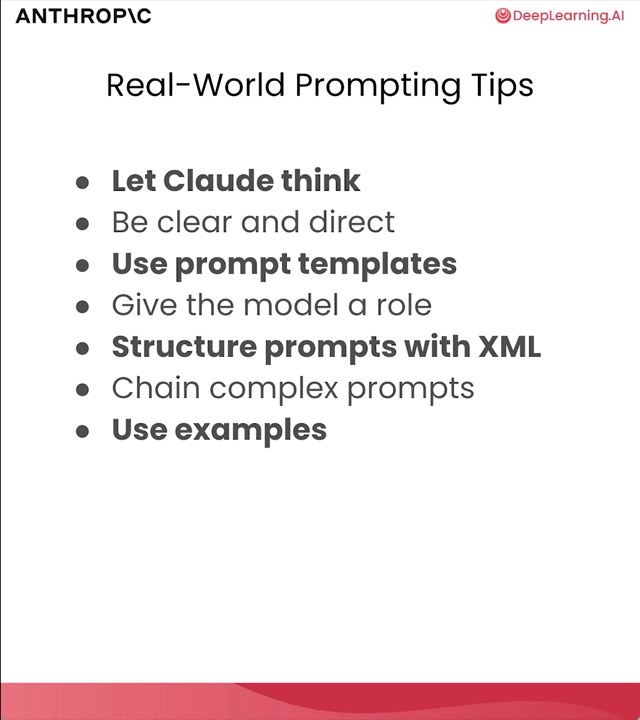

### A Consumer Prompt

In [12]:
consumer_prompt = "help me brainstorm ideas for a talk on AI and education"

### An Enterprise-Grade Prompt

In [13]:
enterprise_prompt = """
Analyze the following customer service call transcript and generate a JSON summary of the interaction:

<transcript>
[INSERT CALL TRANSCRIPT HERE]
</transcript>

Instructions:
<instructions>
1. Read the transcript carefully.
2. Analyze the transcript, focusing on the main issue, resolution, and any follow-up required.
3. Generate a JSON object summarizing the key aspects of the interaction according to the specified structure.

Important guidelines:
- Confidentiality: Omit all specific customer data like names, phone numbers, and email addresses.
- Character limit: Restrict each text field to a maximum of 100 characters.
- Maintain a professional tone in your summary.

Output format:
Generate a JSON object with the following structure:
<json>
{
  "summary": {
    "customerIssue": "Brief description of the main problem or reason for the call",
    "resolution": "How the issue was addressed or resolved, if applicable",
    "followUpRequired": true/false,
    "followUpDetails": "Description of any necessary follow-up actions, or null if none required"
  },
  "status": "COMPLETE",
  "ambiguities": ["List of any unclear or vague points in the conversation, or an empty array if none"]
}
</json>

Insufficient data criteria:
   If any of these conditions are met:
   a) The transcript has fewer than 5 total exchanges
   b) The customer's issue is unclear
   c) The call is garbled, incomplete, or is hindered by a language barrier
   Then return ONLY the following JSON:
   {
     "status": "INSUFFICIENT_DATA"
   }

Examples: 
<examples>
1. Complete interaction:
<transcript>
Agent: Thank you for calling Acme Smart Home Support. This is Alex. How may I assist you today?
Customer: Hi Alex, my Acme SmartTherm isn't maintaining the temperature I set. It's set to 72 but the house is much warmer.
Agent: I'm sorry to hear that. Let's troubleshoot. Is your SmartTherm connected to Wi-Fi?
Customer: Yes, the Wi-Fi symbol is showing on the display.
Agent: Great. Let's recalibrate your SmartTherm. Press and hold the menu button for 5 seconds.
Customer: Okay, done. A new menu came up.
Agent: Perfect. Navigate to "Calibration" and press select. Adjust the temperature to match your room thermometer.
Customer: Alright, I've set it to 79 degrees to match.
Agent: Great. Press select to confirm. It will recalibrate, which may take a few minutes. Check back in an hour to see if it's fixed.
Customer: Okay, I'll do that. Thank you for your help, Alex.
Agent: You're welcome! Is there anything else I can assist you with today?
Customer: No, that's all. Thanks again.
Agent: Thank you for choosing Acme Smart Home. Have a great day!
</transcript>

<thinking>
Main issue: SmartTherm not maintaining set temperature
Resolution: Guided customer through recalibration process
Follow-up: Not required, but customer should check effectiveness after an hour
Ambiguities: None identified
</thinking>

<json>
{
  "summary": {
    "customerIssue": "SmartTherm not maintaining set temperature, showing higher than set 72 degrees",
    "resolution": "Guided customer through SmartTherm recalibration process",
    "followUpRequired": false,
    "followUpDetails": null
  },
  "status": "COMPLETE",
  "ambiguities": []
}
</json>

2. Interaction requiring follow-up:
<transcript>
Agent: Acme Smart Home Support, this is Jamie. How can I help you?
Customer: Hi, I just installed my new Acme SmartCam, but I can't get it to connect to my Wi-Fi.
Agent: I'd be happy to help. Are you using the Acme Smart Home app?
Customer: Yes, I have the app on my phone.
Agent: Great. Make sure your phone is connected to the 2.4GHz Wi-Fi network, not the 5GHz one.
Customer: Oh, I'm on the 5GHz network. Should I switch?
Agent: Yes, please switch to the 2.4GHz network. The SmartCam only works with 2.4GHz.
Customer: Okay, done. Now what?
Agent: Open the app, select 'Add Device', choose 'SmartCam', and follow the on-screen instructions.
Customer: It's asking for a password now.
Agent: Enter your Wi-Fi password and it should connect.
Customer: It's still not working. I keep getting an error message.
Agent: I see. In that case, I'd like to escalate this to our technical team. They'll contact you within 24 hours.
Customer: Okay, that sounds good. Thank you for trying to help.
Agent: You're welcome. Is there anything else you need assistance with?
Customer: No, that's all for now. Thanks again.
Agent: Thank you for choosing Acme Smart Home. Have a great day!
</transcript>

<thinking>
Main issue: Customer unable to connect new SmartCam to Wi-Fi
Resolution: Initial troubleshooting unsuccessful, issue escalated to technical team
Follow-up: Required, technical team to contact customer within 24 hours
Ambiguities: Specific error message customer is receiving not mentioned
</thinking>

<json>
{
  "summary": {
    "customerIssue": "Unable to connect new SmartCam to Wi-Fi",
    "resolution": "Initial troubleshooting unsuccessful, issue escalated to technical team",
    "followUpRequired": true,
    "followUpDetails": "Technical team to contact customer within 24 hours for further assistance"
  },
  "status": "COMPLETE",
  "ambiguities": ["Specific error message customer is receiving not mentioned"]
}
</json>

3. Insufficient data:
<transcript>
Agent: Acme Smart Home Support, this is Sam. How may I assist you?
Customer: Hi, my smart lock isn't working.
Agent: I'm sorry to hear that. Can you tell me more about the issue?
Customer: It just doesn't work. I don't know what else to say.
Agent: Okay, when did you first notice the problem? And what model of Acme smart lock do you have?
Customer: I don't remember. Listen, I have to go. I'll call back later.
Agent: Alright, we're here 24/7 if you need further assistance. Have a good day.
</transcript>

<thinking>
This transcript has fewer than 5 exchanges and the customer's issue is unclear. The customer doesn't provide specific details about the problem with the smart lock or respond to the agent's questions. This interaction doesn't provide sufficient information for a complete summary.
</thinking>

<json>
{
  "status": "INSUFFICIENT_DATA"
}
</json>
</examples>
</instructions>

Before generating the JSON, please analyze the transcript in <thinking> tags. 
Include your identification of the main issue, resolution, follow-up requirements, and any ambiguities. 
Then, provide your JSON output in <json> tags.
"""

## Our Goal

### Sample Customer Reviews

I recently purchased the XYZ Smartphone, and I have to say, it's been a mixed experience. On the positive side, the camera quality is absolutely stunning. The photos I've taken are crisp, clear, and the colors are vibrant. The battery life is also impressive, lasting me a full day even with heavy use.

However, there are a few issues that have been frustrating. Firstly, the phone tends to overheat when I'm using multiple apps or playing games for extended periods. It becomes uncomfortably warm to hold. Secondly, the facial recognition feature is unreliable. It often fails to recognize me in low light conditions, forcing me to use the PIN instead.

The user interface is sleek and intuitive, which I appreciate. But I've noticed occasional lag when switching between apps, which is disappointing for a phone at this price point. Customer support has been helpful in addressing some of my concerns, but they haven't been able to resolve the overheating issue.

Overall, while I'm impressed with certain aspects of the phone, the negatives are significant enough that I'm not sure I can wholeheartedly recommend it. It's a decent phone, but for the price, I expected fewer issues.

### Desired Output

```json
{
  "sentiment_score": "Negative",
  "sentiment_analysis": "While the review acknowledges positive aspects (camera quality, battery life, and user interface), the overall sentiment is negative due to multiple unresolved technical issues, performance problems, and price-to-value concerns. The reviewer explicitly states reluctance to recommend the product and concludes with disappointment regarding the value proposition.",
  "complaints": [
    "Phone overheating during multiple apps usage and gaming",
    "Unreliable facial recognition system, especially in low light",
    "Performance lag when switching between apps",
    "Poor value for money considering the price point"
  ]
}
```

## Writing Our Prompt

### Set The Role

In [14]:
setting_the_role = """
You are an AI assistant specialized in analyzing customer reviews. 
Your task is to determine the overall sentiment of a given review 
and extract any specific complaints mentioned. 
Please follow these instructions carefully:
"""

### Make It A Prompt Template

In [15]:
instruction_pt1 = """
1. Review the following customer feedback:

<customer_review>
{{CUSTOMER_REVIEW}}
</customer_review>
"""

### Let Claude Think

In [16]:
instruction_pt2 = """
2. Analyze the review using the following steps. 
Show your work in <review_breakdown> tags:

a) Key Phrase Extraction:
   - Extract and quote key phrases that indicate sentiment 
   (positive, negative, or neutral).
   - Extract and quote key phrases that suggest complaints or issues.

b) Sentiment Analysis:
   - Consider arguments for positive, negative, 
   and neutral sentiment based on the extracted phrases.
   - Determine the overall sentiment (positive, negative, or neutral) 
   based on your analysis.
   - Explain your reasoning for the sentiment classification.

c) Complaint Extraction:
   - List each specific issue or problem mentioned in the review.
   - For each complaint, provide the relevant quote from the review.
   - Count the total number of complaints found.

It's OK for this section to be quite long as you 
thoroughly break down the review.
"""

### Output Instructions

In [17]:
instruction_pt3 = """
3. Based on your analysis, 
generate a JSON output with the following structure:

<json>
{
  "sentiment_score": "Positive|Negative|Neutral",
  "sentiment_analysis": "Explanation of sentiment classification",
  "complaints": [
    "Complaint 1",
    "Complaint 2",
    "..."
  ]
}
</json>

If no complaints are found, 
use an empty array for the "complaints" field.

Remember:
- Base your analysis solely on the content of the provided review.
- Do not make assumptions or include information 
not present in the review.
- Be objective and focus on the customer's expressed 
opinions and experiences.
- Ensure your JSON output is properly formatted 
and contains all required fields.
"""

### Assembling The Prompt

In [18]:
final_prompt = f"""
{setting_the_role}
{instruction_pt1}
{instruction_pt2}
{instruction_pt3}
"""

In [19]:
print(final_prompt)



You are an AI assistant specialized in analyzing customer reviews. 
Your task is to determine the overall sentiment of a given review 
and extract any specific complaints mentioned. 
Please follow these instructions carefully:


1. Review the following customer feedback:

<customer_review>
{{CUSTOMER_REVIEW}}
</customer_review>


2. Analyze the review using the following steps. 
Show your work in <review_breakdown> tags:

a) Key Phrase Extraction:
   - Extract and quote key phrases that indicate sentiment 
   (positive, negative, or neutral).
   - Extract and quote key phrases that suggest complaints or issues.

b) Sentiment Analysis:
   - Consider arguments for positive, negative, 
   and neutral sentiment based on the extracted phrases.
   - Determine the overall sentiment (positive, negative, or neutral) 
   based on your analysis.
   - Explain your reasoning for the sentiment classification.

c) Complaint Extraction:
   - List each specific issue or problem mentioned in the revie

## Using The Prompt

In [20]:
import re
def get_review_sentiment(review):
    #Insert the context into the prompt
    prompt = final_prompt.replace("{{CUSTOMER_REVIEW}}", review)
    # Send a request to Claude
    response = client.messages.create(
        model=MODEL_NAME,
        max_tokens=2000,
        messages=[
            {"role": "user", "content": prompt}        
        ]
    )
    output = response.content[0].text
    print("ENTIRE MODEL OUTPUT: ")
    print(output)
    
    sentiment = re.search(r'<json>(.*?)</json>', output, re.DOTALL)
    
    if sentiment:
        print("FINAL JSON OUTPUT: ")
        print(sentiment.group(1).strip())
    else:
        print("No sentiment analysis in the response.")

In [21]:
review1 = """
I am in love with my Acme phone.  It's incredible.
It's a little expensive, but so worth it imo.
If you can afford it, it's worth it! 
I love the colors too!
"""

In [22]:
get_review_sentiment(review1)

ENTIRE MODEL OUTPUT: 
<review_breakdown>

a) Key Phrase Extraction:

Positive sentiment phrases:
- "in love with"
- "incredible"
- "so worth it"
- "worth it!"
- "I love the colors"

Potential negative/concern phrases:
- "a little expensive"

b) Sentiment Analysis:

Arguments for positive sentiment:
- Multiple expressions of strong positive emotion ("in love", "incredible")
- Repeated emphasis on value despite price ("so worth it", "worth it!")
- Enthusiastic about aesthetics ("love the colors")
- Use of exclamation marks indicating excitement
- Even the price concern is immediately countered with positive value assessment

Arguments for negative sentiment:
- Minor price concern mentioned

Arguments for neutral sentiment:
- None significant

Overall Sentiment: POSITIVE
Reasoning: The review is overwhelmingly positive with multiple strong positive expressions. The single mention of price is immediately qualified as being worth it, turning a potential negative into a positive value propos

<p style="background-color:#f7fff8; padding:15px; border-width:3px; border-color:#e0f0e0; border-style:solid; border-radius:6px"> 🚨
&nbsp; <b>Different Run Results:</b> The output generated by AI chat models can vary with each execution due to their probabilistic nature. Don't be surprised if your results differ from those shown in the video.</p>

In [23]:
review2 = """
I recently bought the ABC Smartwatch, and I have to say, it's been a 
bit of a rollercoaster. Let's start with the good stuff - 
the design is absolutely gorgeous. It's sleek, lightweight, 
and looks fantastic on my wrist. The display is crisp and bright, 
even in direct sunlight. I also love how customizable the watch 
faces are, allowing me to switch up the look whenever I want.
However, there are some significant downsides that I can't ignore. 
The battery life is terrible - I'm lucky if I get through a full 
day without needing to charge it. This is especially frustrating
when I'm traveling or out for long periods. The fitness tracking 
features, which were a big selling point for me, are hit or miss. 
It often doesn't accurately count my steps or calculate calories burned 
during workouts. Another issue I've encountered is with the touch 
sensitivity. Sometimes it's overly sensitive, registering accidental 
touches, while other times I have to tap multiple times for it to 
respond. It's inconsistent and annoying, especially when I'm trying to 
quickly check notifications or start a workout.On the plus side, the 
integration with my smartphone is seamless, and I appreciate being able 
to respond to texts and calls from my wrist. The water resistance has 
also held up well - I've worn it while swimming without any problems.
Customer service has been decent. They were quick to respond when I 
reported the battery issue, but their solution of turning off certain 
features defeats the purpose of having a smartwatch. All in all, while 
there are aspects of the ABC Smartwatch that I really like, the battery 
life and inconsistent performance are major drawbacks. For the price 
point, I expected better. It's not worth your money.
"""

In [24]:
get_review_sentiment(review2)

ENTIRE MODEL OUTPUT: 
<review_breakdown>

a) Key Phrase Extraction:

Positive Phrases:
- "design is absolutely gorgeous"
- "sleek, lightweight, and looks fantastic"
- "display is crisp and bright"
- "love how customizable the watch faces are"
- "integration with my smartphone is seamless"
- "water resistance has held up well"
- "customer service has been decent"
- "quick to respond"

Negative Phrases:
- "significant downsides that I can't ignore"
- "battery life is terrible"
- "lucky if I get through a full day"
- "fitness tracking features are hit or miss"
- "doesn't accurately count my steps or calculate calories"
- "touch sensitivity... inconsistent and annoying"
- "not worth your money"
- "solution of turning off certain features defeats the purpose"

b) Sentiment Analysis:
Arguments for Positive:
- Strong praise for design and aesthetics
- Satisfaction with display quality
- Good smartphone integration
- Reliable water resistance
- Responsive customer service

Arguments for Negati

## Examples

In [25]:
examples = """
Here are some example inputs and outputs to help you understand
the sort of analysis we're looking for
<examples>
<example1>

<customer_review>
I recently bought the ABC Smartwatch, and I have to say, it's been a bit of a rollercoaster. Let's start with the good stuff - the design is absolutely gorgeous. It's sleek, lightweight, and looks fantastic on my wrist. The display is crisp and bright, even in direct sunlight. I also love how customizable the watch faces are, allowing me to switch up the look whenever I want.
However, there are some significant downsides that I can't ignore. The battery life is terrible - I'm lucky if I get through a full day without needing to charge it. This is especially frustrating when I'm traveling or out for long periods. The fitness tracking features, which were a big selling point for me, are hit or miss. It often doesn't accurately count my steps or calculate calories burned during workouts.
Another issue I've encountered is with the touch sensitivity. Sometimes it's overly sensitive, registering accidental touches, while other times I have to tap multiple times for it to respond. It's inconsistent and annoying, especially when I'm trying to quickly check notifications or start a workout.
On the plus side, the integration with my smartphone is seamless, and I appreciate being able to respond to texts and calls from my wrist. The water resistance has also held up well - I've worn it while swimming without any problems.
Customer service has been decent. They were quick to respond when I reported the battery issue, but their solution of turning off certain features defeats the purpose of having a smartwatch.
All in all, while there are aspects of the ABC Smartwatch that I really like, the battery life and inconsistent performance are major drawbacks. For the price point, I expected better. It's not worth your money.
</customer_review>

<ideal_output>
<review_analysis>
a) Key Phrase Extraction:

Positive Phrases:
1. "design is absolutely gorgeous"
2. "sleek, lightweight, and looks fantastic"
3. "display is crisp and bright"
4. "love how customizable the watch faces are"
5. "integration with my smartphone is seamless"
6. "water resistance has held up well"
7. "customer service has been decent"

Negative Phrases:
1. "bit of a rollercoaster"
2. "battery life is terrible"
3. "lucky if I get through a full day"
4. "fitness tracking features are hit or miss"
5. "doesn't accurately count my steps"
6. "touch sensitivity... overly sensitive"
7. "have to tap multiple times"
8. "inconsistent and annoying"
9. "solution of turning off certain features defeats the purpose"
10. "battery life and inconsistent performance are major drawbacks"
11. "not worth your money"

b) Sentiment Analysis:
Arguments for positive sentiment:
- The design and aesthetics of the watch are highly praised
- The display quality is commended
- Customization options are appreciated
- Smartphone integration works well
- Water resistance feature is effective
- Customer service responded quickly

Arguments for negative sentiment:
- Battery life is severely criticized
- Fitness tracking, a key feature, is unreliable
- Touch sensitivity issues cause frustration
- The proposed solution compromises functionality
- The price doesn't justify the performance
- The reviewer explicitly states it's not worth the money

Considering the strength and frequency of sentiments:
- Positive sentiments are mostly about aesthetics and basic functions
- Negative sentiments relate to core functionalities and user experience
- The reviewer uses stronger language for negative aspects ("terrible", "major drawbacks", "not worth your money")
- The conclusion emphasizes disappointment and recommends against purchase

Based on this analysis, the overall sentiment leans negative. While the reviewer appreciates certain aspects, the core issues with battery life, performance, and value for money overshadow the positives. The explicit recommendation against purchase is a strong indicator of overall negative sentiment.

c) Complaint Extraction:
1. Poor battery life
   Quote: "The battery life is terrible - I'm lucky if I get through a full day without needing to charge it"

2. Inaccurate fitness tracking
   Quote: "The fitness tracking features, which were a big selling point for me, are hit or miss. It often doesn't accurately count my steps or calculate calories burned during workouts"

3. Inconsistent touch sensitivity
   Quote: "Sometimes it's overly sensitive, registering accidental touches, while other times I have to tap multiple times for it to respond"

4. Inadequate solution to problems
   Quote: "their solution of turning off certain features defeats the purpose of having a smartwatch"

Total Complaints: 4

d) Summary:
The analysis of the ABC Smartwatch review reveals a predominantly negative sentiment. While the customer appreciates the design, display quality, and some basic features, these positives are outweighed by significant issues with core functionalities. The main complaints center around poor battery life, inaccurate fitness tracking, inconsistent touch sensitivity, and inadequate problem-solving from customer service. The reviewer concludes that the product is not worth the money, emphasizing that the drawbacks are too significant to justify the price point.
</review_analysis>

<json>
{
  "sentiment_score": "Negative",
  "sentiment_analysis": "While the review acknowledges positive aspects like design and basic functionality, the overall sentiment is negative due to significant issues with core features (battery life, fitness tracking, touch sensitivity). The reviewer explicitly states it's 'not worth your money' and emphasizes major drawbacks that overshadow the positive elements.",
  "complaints": [
    "Poor battery life requiring daily charging",
    "Inaccurate fitness tracking features",
    "Inconsistent touch sensitivity causing user interface problems",
    "Inadequate customer service solutions that compromise device functionality"
  ]
}
</json>
</ideal_output>

</example1>
</examples>
"""